### Player Salary Prediction
- Import libraries
- Import dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
df =pd.read_csv('nba2K-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


**Shape of dataset**

In [2]:
df.shape

(439, 15)

**info of dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    439 non-null    object
 1   rating       439 non-null    int64 
 2   jersey       439 non-null    object
 3   team         416 non-null    object
 4   position     439 non-null    object
 5   b_day        439 non-null    object
 6   height       439 non-null    object
 7   weight       439 non-null    object
 8   salary       439 non-null    object
 9   country      439 non-null    object
 10  draft_year   439 non-null    int64 
 11  draft_round  439 non-null    object
 12  draft_peak   439 non-null    object
 13  college      370 non-null    object
 14  version      439 non-null    object
dtypes: int64(2), object(13)
memory usage: 51.6+ KB


**drop null-value**

In [4]:
df =df.dropna()

**remove all null-value**

In [5]:
df.isnull().sum()

full_name      0
rating         0
jersey         0
team           0
position       0
b_day          0
height         0
weight         0
salary         0
country        0
draft_year     0
draft_round    0
draft_peak     0
college        0
version        0
dtype: int64

**ignore that columns**

In [6]:
df =df.drop(['full_name', 'b_day', 'height', 'weight', 'college', 'version'], axis=1)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,#30,Golden State Warriors,G,$40231758,USA,2009,1,7
6,94,#3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1


**remove hashtag in jersey column**

In [7]:
def removehash(value):
    value =value[1:]
    return int(value)
df['jersey'] = df['jersey'].apply(removehash)    

In [8]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,$40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1


**remove dollar sign in salary column**

In [9]:
def removedollar(value):
    value =value[1:]
    return int(value)
df['salary'] = df['salary'].apply(removedollar) 

In [10]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1


**Team value counts**

In [11]:
df['team'].value_counts()

Los Angeles Lakers        15
New Orleans Pelicans      14
Brooklyn Nets             14
Indiana Pacers            14
Milwaukee Bucks           14
Orlando Magic             14
New York Knicks           13
Chicago Bulls             13
Los Angeles Clippers      13
Philadelphia 76ers        13
Detroit Pistons           12
Minnesota Timberwolves    12
San Antonio Spurs         12
Memphis Grizzlies         12
Houston Rockets           12
Sacramento Kings          12
Phoenix Suns              12
Denver Nuggets            12
Dallas Mavericks          11
Atlanta Hawks             11
Toronto Raptors           11
Boston Celtics            11
Miami Heat                11
Cleveland Cavaliers       10
Washington Wizards        10
Portland Trail Blazers    10
Oklahoma City Thunder      9
Golden State Warriors      9
Utah Jazz                  8
Charlotte Hornets          7
Name: team, dtype: int64

In [12]:
df['country'].value_counts()

USA                   300
Canada                 15
Australia               7
Nigeria                 3
Cameroon                3
The Bahamas             2
Ukraine                 2
Mali                    1
Egypt                   1
Haiti                   1
Angola                  1
Germany                 1
Italy                   1
United Kingdom          1
Japan                   1
Israel                  1
Austria                 1
Senegal                 1
Puerto Rico             1
Philippines             1
Lithuania               1
New Zealand             1
Finland                 1
Dominican Republic      1
Montenegro              1
Greece                  1
Name: country, dtype: int64

**arrange the countries outlier**

In [13]:
def removecountryoutlier(value):
    if value not in ['USA', 'Canada', 'Australia']:
        return 'others'
    else:
        return value
df['country'] = df['country'].apply(removecountryoutlier)
df['country'].value_counts()            

USA          300
others        29
Canada        15
Australia      7
Name: country, dtype: int64

In [14]:
df['position'].value_counts()

G      154
F      119
C       30
F-C     25
G-F     11
F-G      7
C-F      5
Name: position, dtype: int64

In [15]:
df['draft_round'].unique()

array(['1', '2', 'Undrafted'], dtype=object)

In [16]:
df['draft_peak'].unique	

<bound method Series.unique of 1      15
3       2
4       3
5       7
6       1
       ..
433     7
434     2
435     1
437     6
438     3
Name: draft_peak, Length: 351, dtype: object>

In [17]:
def removeUndrafted(value):
    if value == 'Undrafted':
        return
    else:
        return value
df['draft_round']= df['draft_round'].apply(removeUndrafted)
df['draft_peak'] = df['draft_peak'].apply(removeUndrafted)    
df = df.dropna()

**transform string columns**

In [18]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['team'] =le.fit_transform(df['team'])
df['position']= le.fit_transform(df['position'])
df['country']= le.fit_transform(df['country'])

**clean dataset**

In [19]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,12,2,32742000,2,2011,1,15
3,96,7,2,2,37199000,2,2007,1,2
4,96,13,10,5,38199000,2,2009,1,3
5,95,30,9,5,40231758,2,2009,1,7
6,94,3,13,3,27093019,2,2012,1,1


In [20]:
df.describe()

,rating,jersey,team,position,salary,country,draft_year
count,299.000000,299.000000,299.000000,299.000000,2.990000e+02,299.000000,299.000000
mean,77.591973,13.755853,14.655518,3.327759,1.023471e+07,2.016722,2014.237458
std,6.237530,14.925450,8.356069,1.745444,1.070082e+07,0.429282,3.868710
min,68.000000,0.000000,0.000000,0.000000,7.956800e+04,0.000000,2003.000000
25%,73.000000,3.000000,8.000000,2.000000,2.300922e+06,2.000000,2012.000000
50%,76.000000,10.000000,15.000000,3.000000,5.718000e+06,2.000000,2015.000000
75%,80.000000,21.500000,22.000000,5.000000,1.376370e+07,2.000000,2018.000000
max,97.000000,99.000000,29.000000,6.000000,4.578097e+07,3.000000,2019.000000


**split the dataset X and y**

In [21]:
X = df.drop(['salary'],axis =1)
y =df['salary']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =train_test_split(X, y, test_size =0.2)

In [23]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression().fit(X_train, y_train)
pred = lr.predict(X_test)

In [24]:
diff = y_test - pred 

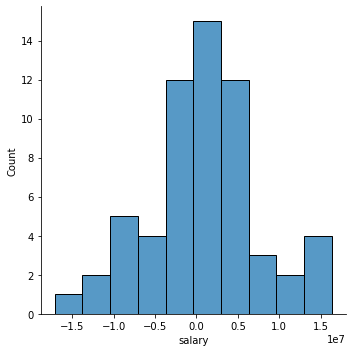

In [25]:
import seaborn as sns 
sns.displot(diff)

In [39]:
import pickle
pickle.dump(lr, open('./model.sav', 'wb'))